In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.dates as mdates
%matplotlib inline


In [22]:
# LOAD IN ACTIVTY FROM FILE
proposal_file_path = 'proposals.csv'
comments_file_path = 'comments.csv'
debates_file_path = 'debates.csv'
votes_file_path = 'votes.csv'
# decide_proposals = []
# proposalReader = csv.DictReader(
#     open(proposal_file_path, newline=''), delimiter=';', quotechar='"')
# for proposal in proposalReader:
#     decide_proposals.append(proposal)

decide_proposals = pd.read_csv(proposal_file_path, sep=";", parse_dates=['created_at', 'retired_at'])
decide_comments = pd.read_csv(comments_file_path, sep=";")
decide_debates = pd.read_csv(debates_file_path, sep=";")
decide_votes = pd.read_csv(votes_file_path, sep=";")


In [23]:
print("There are", len(decide_proposals), "proposals")
print("There are", len(decide_comments), "comments")
print("There are", len(decide_debates), "debates")
print("There are", len(decide_votes), "votes")

There are 22994 proposals
There are 123750 comments
There are 3603 debates
There are 3360454 votes


In [16]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)|(<p>)|<\s*p>|\r|\n")

# def preprocess_descriptions(proposals):
#     for proposal in proposals:
#             proposal['clean_description'] = REPLACE_NO_SPACE.sub("", proposal['description'].lower())
#             proposal['clean_description'] = REPLACE_WITH_SPACE.sub(" ", proposal['clean_description'])
#             proposal['clean_description'] = proposal['clean_description'].strip()
#     return proposals

def preprocess_description(df, description_column):
    df['clean_description'] = (
        df[description_column].replace(REPLACE_NO_SPACE, '')
        .replace(REPLACE_WITH_SPACE, ' ')
        .str.lower()
        .str.strip()
    )
    return df

decide_proposals = preprocess_description(decide_proposals, 'description')


In [17]:
decide_proposals.head()

,id,commentable_id,commentable_type,body,created_at,cached_votes_total,cached_votes_up,cached_votes_down,ancestry,confidence_score
0,9,3,Debate,Ilusionante sin duda.,07/09/2015 10,9,7,2,NaN,388
1,10,3,Debate,Queda por ver cómo se consigue articular y qué...,07/09/2015 10,7,5,2,NaN,214
2,11,4,Debate,"Estoy de acuerdo contigo Jesús, pero si algún ...",07/09/2015 10,2,1,1,NaN,0
3,14,3,Debate,"Me parece muy buen paso, pero deja fuera a tod...",07/09/2015 10,1,1,0,NaN,100
4,19,3,Debate,"Hola, Fuencisla:\n\n¿Qué canales alternativos ...",07/09/2015 11,1,1,0,14,100


In [24]:
decide_comments.head()

,id,commentable_id,commentable_type,body,created_at,cached_votes_total,cached_votes_up,cached_votes_down,ancestry,confidence_score
0,9,3,Debate,Ilusionante sin duda.,07/09/2015 10,9,7,2,NaN,388
1,10,3,Debate,Queda por ver cómo se consigue articular y qué...,07/09/2015 10,7,5,2,NaN,214
2,11,4,Debate,"Estoy de acuerdo contigo Jesús, pero si algún ...",07/09/2015 10,2,1,1,NaN,0
3,14,3,Debate,"Me parece muy buen paso, pero deja fuera a tod...",07/09/2015 10,1,1,0,NaN,100
4,19,3,Debate,"Hola, Fuencisla:\n\n¿Qué canales alternativos ...",07/09/2015 11,1,1,0,14,100


In [25]:
decide_debates.head()

,id,title,description,created_at,cached_votes_total,cached_votes_up,cached_votes_down,comments_count,hot_score,confidence_score
0,3,¿Qué os parece este nuevo espacio de debate?,<p>Empezamos a abrir secciones con este espaci...,06/09/2015 14,1546,1331,215,322,862534855,96079
1,4,Basuras Moncloa,"<p>Ya sé que es un debate manido, pero el dist...",07/09/2015 10,57,52,5,1,859606961,4287
2,5,Funciones de la policía municipal de Madrid.,<p>Propongo <strong>repensar algunas de las fu...,07/09/2015 10,248,189,59,14,860632412,9907
3,7,Madrid ciclista y bicimad,<p>Me gustaría saber qué problemas detectamos ...,07/09/2015 10,318,256,62,142,863816823,15617
4,8,¿SOPLADORAS? NO GRACIAS,<p>La sopladoras son máquinas realmente infern...,07/09/2015 10,847,713,134,41,867898123,48739


In [26]:
decide_votes.head()

,votable_id,votable_type,vote_flag,created_at
0,3,Debate,True,06/09/2015 14
1,3,Debate,True,06/09/2015 15
2,3,Debate,True,06/09/2015 23
3,3,Debate,True,07/09/2015 10
4,3,Debate,True,07/09/2015 10


In [7]:
decide_proposals.describe()
decide_proposals.dtypes

id                              int64
title                          object
description                    object
external_url                   object
cached_votes_up                 int64
comments_count                  int64
hot_score                       int64
confidence_score                int64
created_at             datetime64[ns]
summary                        object
video_url                      object
geozone_id                    float64
retired_at             datetime64[ns]
retired_reason                 object
retired_explanation            object
proceeding                     object
sub_proceeding                 object
clean_description              object
dtype: object

In [8]:
decide_proposals['created_at_day'] = decide_proposals['created_at'].map(lambda x: x.strftime('%Y-%m-%d'))
decide_proposals['created_at_month'] = decide_proposals['created_at'].map(lambda x: x.strftime('%Y-%m'))
decide_proposals['created_at_year'] = decide_proposals['created_at'].map(lambda x: x.strftime('%Y'))

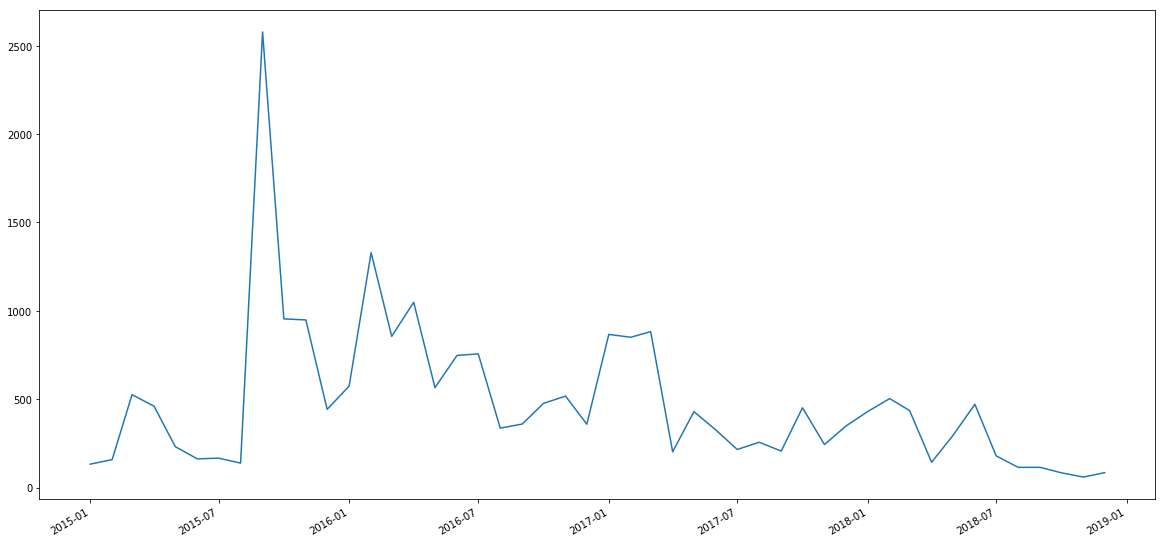

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
all_months = decide_proposals.groupby('created_at_month')['created_at_month'].count()
all_years = decide_proposals.groupby('created_at_year')['created_at_year'].count()
all_days = decide_proposals.groupby('created_at_day')['created_at_day'].count()
ax.plot(pd.to_datetime(all_months.index), all_months)
fig.autofmt_xdate()


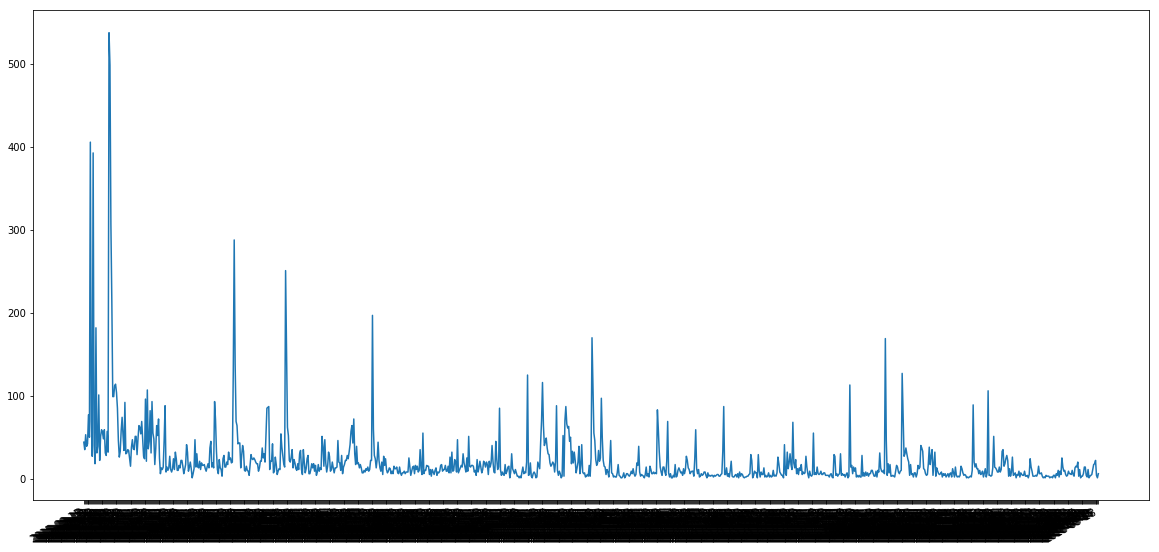

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(decide_proposals['created_at_day'].unique(), decide_proposals.groupby('created_at_day')['created_at_day'].count())
fig.autofmt_xdate()
